**Importing Libraries here**

In [94]:
import numpy as np
import pandas as pd
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# !pip install nltk


**Loading DataSet**

In [95]:
data = pd.read_csv("/content/drive/MyDrive/DATA/epi_r.csv")

In [96]:
# data

**Loading Second Data File**

In [97]:
# Python program to read
# json file
import json
# Opening JSON file
f = open('/content/drive/MyDrive/DATA/full_format_recipes.json')

# returns JSON object as
# a dictionary
j_data = json.load(f)

recipi_data =pd.DataFrame(j_data)
    # return recipi_data[["title","ingredients","directions"]]

In [98]:
recipi_data.head(5)


importent_data = recipi_data[['title','calories','protein','rating','ingredients','fat']]
# importent_data.head(5)

**bold text**

In [99]:
cuisine_keywords = {
    'Italian': [
        'pizza', 'pasta', 'risotto', 'lasagna', 'gnocchi', 'spaghetti', 'cannoli',
        'calzone', 'panettone', 'tiramisu', 'osso buco', 'carbonara', 'cacciatore',
        'pesto', 'caprese', 'polenta', 'ricotta', 'prosciutto', 'bruschetta',
        'limoncello', 'tortellini', 'parmigiana', 'amaretto', 'taleggio', 'ciabatta',
        'focaccia', 'tagliatelle', 'cappuccino', 'marsala', 'straciatella', 'arancini',
        'minestrone', 'panna cotta', 'frittata', 'cacio e pepe', 'amaretti', 'canoli',
        'spumoni', 'biscotti', 'lasagne', 'cannelloni', 'vermicelli', 'mortadella',
        'burrata', 'tartufo', 'calamari', 'caponata', 'frutti di mare', 'limoncello',
        'affogato', 'gorgonzola', 'polpette', 'cioppino', 'marinara', 'zeppole',
        'capocollo', 'scampi', 'struffoli', 'pastina', 'ciacci', 'polpo', 'sbrisolona',
        'pandoro', 'piadina', 'taralli', 'angioletti', 'rosticceria', 'sorbetto',
        'frittelle', 'spaghetti alla chitarra', 'americano', 'risi e bisi',
        'salumi', 'cipollini', 'tarallucci', 'agnolotti', 'melanzane', 'porchetta',
        'verde', 'vitello', 'parmigiano', 'peperoncino', 'aragosta', 'bottarga',
        'bolognese', 'saltimbocca', 'ossobuco', 'limonata', 'pomodoro', 'gelato',
        'pancetta', 'panforte', 'pizzelle', 'zeppola', 'pizzoccheri', 'amaro'
    ],
    'Mexican': [
        'taco', 'burrito', 'enchilada', 'guacamole', 'salsa', 'quesadilla', 'churro',
        'nachos', 'tostada', 'flauta', 'tlayuda', 'chilaquiles', 'horchata',
        'elote', 'mole', 'chiles rellenos', 'sopes', 'pozole', 'tamales',
        'al pastor', 'carnitas', 'menudo', 'aguas frescas', 'cochinita pibil',
        'molletes', 'atole', 'salsa verde', 'salsa roja', 'nopalitos', 'birria',
        'huaraches', 'cebiche', 'chapulines', 'chapulín', 'escamoles', 'mezcal',
        'tequila', 'margarita', 'michelada', 'pulque', 'charro beans', 'tamarind',
        'birria de res', 'chayote', 'tostilocos', 'cacahuate', 'chocolate',
        'aguachile', 'carne asada', 'ceviche', 'cotija', 'hoja santa', 'mexicola',
        'chileatole', 'piloncillo', 'puebla', 'veracruz', 'chiapas', 'oaxaca',
        'hidalgo', 'yucatan', 'jalisco', 'sonora', 'sinaloa', 'nayarit', 'zacatecas',
        'aguascalientes', 'guanajuato', 'queretaro', 'tampico', 'chilango', 'monterrey',
        'coahuila', 'durango', 'zamora', 'guadalajara', 'chihuahua', 'parral',
        'sinaloa', 'culiacan', 'hermosillo', 'juarez', 'tijuana', 'mexicali',
        'nuevo laredo', 'monclova', 'laguna', 'reynosa', 'matamoros', 'piedras negras',
        'saltillo', 'torreon', 'monterrey', 'apodaca', 'san pedro', 'santa catarina',
        'guadalupe', 'nayarit', 'tepic', 'mazatlan', 'culiacan', 'los mochis',
        'hermosillo', 'ciudad obregon', 'juarez', 'oaxaca city', 'puebla city'
    ],
    'Asian': [
        'sushi', 'ramen', 'stir-fry', 'dim sum', 'sashimi', 'tempura', 'bao',
        'pho', 'bibimbap', 'pad thai', 'curry', 'satay', 'baozi', 'congee',
        'kimchi', 'sukiyaki', 'teriyaki', 'yakitori', 'kaiseki', 'miso soup',
        'goyza', 'udon', 'soba', 'takoyaki', 'matcha', 'nigiri', 'shabu shabu',
        'yuzu', 'wasabi', 'okonomiyaki', 'taiyaki', 'mochi', 'chirashi', 'unagi',
        'somen', 'shumai', 'pho bo', 'banh mi', 'bun cha', 'com tam', 'canh chua',
        'mi quang', 'ca kho to', 'bun thit nuong', 'cha gio', 'ca nuong',
        'com chien', 'cha ca', 'pho ga', 'goi cuon', 'hu tieu', 'nom hoa chuoi',
        'thit kho', 'bun bo hue', 'banh beo', 'banh xeo', 'che ba mau', 'che troi nuoc',
        'chao', 'mi hoanh thanh', 'ca phe', 'nuoc mia', 'ca phe sua da', 'nuoc chanh',
        'banh trang', 'goi', 'goi cuon', 'nuoc mam', 'goi du du', 'goi ngo sen',
        'goi tom', 'goi ga', 'cha lua', 'bo la lot', 'rau muong', 'com chay',
        'bun dau mam tom', 'nem ran', 'mi xao', 'bun mam', 'banh my', 'banh tet',
        'bun rieu', 'banh canh', 'banh bot loc', 'goi la', 'cari', 'hu tieu mi',
        'mi quang', 'bun bo nam bo', 'bun cha gio', 'bun thit nuong', 'ca ri ga',
        'banh xeo', 'banh trang tron', 'banh trang cuon', 'banh tam bi', 'oc xao dua'
    ],
    'Mediterranean': [
        'hummus', 'falafel', 'tabbouleh', 'shawarma', 'kebab', 'baba ganoush', 'spanakopita',
        'moussaka', 'baklava', 'tzatziki', 'souvlaki', 'dolma', 'kibbeh', 'manakish',
        'loukoumades', 'knafeh', 'fattoush', 'batata harra', 'kousa mahshi', 'foul medames',
        'muhammara', 'shanklish', 'mujadara', 'sambousek', 'zaatar', 'manti', 'börek',
        'lahmacun', 'mantu', 'kuymak', 'cacik', 'bamya', 'kısır', 'tarator', 'babaganoush',
        'maghmour', 'moutabal', 'turşu', 'kısır', 'acılı ezme', 'kumpir', 'ayran', 'çılbır',
        'duğun çorbası', 'hoşmerim', 'keşkül', 'lokma', 'menemen', 'midye', 'musakka',
        'pastirma', 'pide', 'serbet', 'simit', 'tavuk göğsü', 'taze fasulye', 'tutmac',
        'boza', 'iskembe', 'lakerda', 'mıhlama', 'tarator', 'biber dolması', 'ege usulu kozlenmis biber',
        'çılbır', 'soutzouk loukoum', 'taramosalata', 'yiouvetsi', 'fasolada', 'patsas', 'tsoureki',
        'rizogalo', 'melomakarona', 'pastitsio', 'galaktoboureko', 'kourabiedes', 'feta', 'olives', 'saganaki',
        'loukaniko', 'gemista', 'greek salad', 'avgolemono', 'tsatziki', 'souvlaki', 'spanakopita', 'baklava',
        'gyro', 'pastitsio', 'dolmades', 'melitzanosalata', 'kalamari', 'gemista', 'revithia', 'tirokafteri',
        'stifado', 'tzatziki', 'kleftiko', 'souzouk loukoum', 'choban salat', 'burek', 'crepes', 'kofta', 'pilaki',
        'mamaliga', 'karpouzopita', 'souvlaki', 'greek frappe', 'spanakorizo', 'kreatopita', 'kolokythokeftedes'
    ],
    'Turkish': [
        'doner kebab', 'kofte', 'pide', 'manti', 'borek', 'lentil soup', 'baklava', 'lokum', 'simit', 'kumpir',
        'hunkar begendi', 'iskender kebap', 'pilav', 'menemen', 'cig kofte', 'kuzu tandir', 'imam bayildi', 'biber dolma',
        'hamsi pilav', 'midye tava', 'balik ekmek', 'kabak cicegi dolmasi', 'tavuk kanat', 'gavurdaği salatasi',
        'tarator', 'acili ezme', 'mercimek kofte', 'sucuklu yumurta', 'mantar yahnisi', 'baliq murtu', 'peynirli pide',
        'kopoglu salat', 'sac kavurma', 'molehiya', 'ekmek kadayifi', 'kaygana', 'sogan kebap', 'kebapche', 'izgara balik',
        'mantar kebap', 'bamya yemegi', 'mantar ciger', 'peynirli borek', 'bulgur pilavi', 'patates salat', 'cigirtma',
        'biber kizartma', 'pasa pilavi', 'baharatli kuzu tandir', 'kuzu tandir', 'kadin budu kofte', 'gullac',
        'sutlu nuriye', 'sekerpare', 'kaymakli ekmek kadayifi', 'sahlep', 'turk kahvesi', 'cay', 'ayran', 'salgam',
        'karakoy gevrek', 'kagit helva', 'lokma', 'tulumba', 'kumpir', 'gevrek', 'tirit', 'tavuk sote', 'kagit kebabi',
        'perde pilavi', 'kuzu tandir', 'kagit helva', 'hunkar begendi', 'tarator', 'patates kizartmasi', 'kuzu tandir',
        'pogaca', 'kumpir', 'molehiya', 'pide', 'doner', 'kuzu tandir', 'sutlac', 'kaymak', 'sekerpare', 'lokma', 'tavuk sote',
        'kagit kebabi', 'iskender kebap', 'karnabahar kizartmasi', 'pasa pilavi', 'cig kofte', 'mantar kebap', 'zeytinyagli dolma',
        'mercimek corbasi', 'ezogelin corbasi', 'yogurt corbasi', 'turp otu salatasi', 'pazili borek', 'lahmacun', 'kagit helva',
        'gullac', 'cevizli sucuk', 'kabak cicegi dolmasi', 'mantar ciger', 'ali nazik kebabi', 'peynirli borek', 'boraniye', 'gozleme',
        'perde pilavi', 'bezelye corbasi', 'soguk ayran', 'kelle pacasi corbasi', 'corek otu salatasi', 'sakatat', 'pide', 'sutlac',
        'perde pilavi', 'kuzu tandir', 'tirit', 'tavuk sote', 'kagit kebabi', 'tavuk kanat', 'baharatli kuzu tandir', 'yogurt corbasi',
        'ayran', 'kabak cicegi dolmasi', 'baliq murtu', 'sakatat', 'kuzu tandir', 'bamya yemegi', 'kagit helva', 'soguk ayran', 'cigirtma',
        'kagit kebabi', 'mantar ciger', 'molehiya', 'pide', 'sutlac', 'kaymak', 'sekerpare', 'lokma', 'tavuk sote', 'kagit kebabi',
        'iskender kebap', 'lahmacun', 'pasa pilavi', 'balik ekmek', 'patates kizartmasi', 'kabak cicegi dolmasi', 'soguk ayran',
        'karnabahar kizartmasi', 'biber kizartma', 'kelle pacasi corbasi', 'corek otu salatasi', 'sakatat', 'perde pilavi', 'bezelye corbasi',
        'cigirtma', 'biber kizartma', 'pasa pilavi', 'baharatli kuzu tandir', 'ezogelin corbasi', 'yogurt corbasi', 'tarator', 'patates kizartmasi',
        'zeytinyagli dolma', 'mercimek corbasi', 'kaygana', 'sogan kebap', 'kebapche', 'izgara balik', 'mantar kebap', 'bamya yemegi',
        'mantar ciger', 'peynirli borek', 'bulgur pilavi', 'patates salat', 'cigirtma', 'biber kizartma', 'pasa pilavi', 'baharatli kuzu tandir',
        'kuzu tandir', 'kadin budu kofte', 'gullac', 'sutlu nuriye', 'sekerpare', 'kaymakli ekmek kadayifi', 'sahlep', 'turk kahvesi', 'cay',
        'ayran', 'salgam', 'karakoy gevrek', 'kagit helva', 'lokma', 'tulumba', 'kumpir', 'gevrek', 'tirit', 'tavuk sote', 'kagit kebabi',
        'perde pilavi', 'kuzu tandir', 'kagit helva', 'hunkar begendi', 'tarator', 'patates kizartmasi', 'kuzu tandir', 'pogaca', 'kumpir',
        'molehiya', 'pide', 'doner', 'kuzu tandir', 'sutlac', 'kaymak', 'sekerpare', 'lokma', 'tavuk sote', 'kagit kebabi', 'iskender kebap',
        'karnabahar kizartmasi', 'pasa pilavi', 'cig kofte', 'mantar kebap', 'zeytinyagli dolma', 'mercimek corbasi', 'ezogelin corbasi', 'yogurt corbasi',
        'turp otu salatasi', 'pazili borek', 'lahmacun', 'kagit helva', 'gullac', 'cevizli sucuk', 'kabak cicegi dolmasi', 'mantar ciger', 'ali nazik kebabi',
        'peynirli borek', 'boraniye', 'gozleme', 'perde pilavi', 'bezelye corbasi', 'soguk ayran', 'kelle pacasi corbasi', 'corek otu salatasi', 'sakatat',
        'pide', 'sutlac', 'perde pilavi', 'kuzu tandir', 'tirit', 'tavuk sote', 'kagit kebabi', 'tavuk kanat', 'baharatli kuzu tandir', 'yogurt corbasi',
        'ayran', 'kabak cicegi dolmasi', 'baliq murtu', 'sakatat', 'kuzu tandir', 'bamya yemegi', 'kagit helva', 'soguk ayran', 'cigirtma', 'kagit kebabi',
        'mantar ciger', 'molehiya', 'pide', 'sutlac', 'kaymak', 'sekerpare', 'lokma', 'tavuk sote', 'kagit kebabi', 'iskender kebap', 'lahmacun', 'pasa pilavi',
        'balik ekmek', 'patates kizartmasi', 'kabak cicegi dolmasi', 'soguk ayran', 'karnabahar kizartmasi', 'biber kizartma', 'kelle pacasi corbasi', 'corek otu salatasi',
        'sakatat', 'perde pilavi', 'bezelye corbasi', 'cigirtma', 'biber kizartma', 'pasa pilavi', 'baharatli kuzu tandir', 'ezogelin corbasi', 'yogurt corbasi', 'tarator',
        'patates kizartmasi', 'zeytinyagli dolma', 'mercimek corbasi', 'kaygana', 'sogan kebap', 'kebapche', 'izgara balik', 'mantar kebap', 'bamya yemegi',
        'mantar ciger', 'peynirli borek', 'bulgur pilavi', 'patates salat', 'cigirtma', 'biber kizartma', 'pasa pilavi', 'baharatli kuzu tandir',
        'kuzu tandir', 'kadin budu kofte', 'gullac', 'sutlu nuriye', 'sekerpare', 'kaymakli ekmek kadayifi', 'sahlep', 'turk kahvesi', 'cay', 'ayran',
        'salgam', 'karakoy gevrek', 'kagit helva', 'lokma', 'tulumba', 'kumpir', 'gevrek', 'tirit', 'tavuk sote', 'kagit kebabi', 'perde pilavi',
        'kuzu tandir', 'kagit helva', 'hunkar begendi', 'tarator', 'patates kizartmasi', 'kuzu tandir', 'pogaca', 'kumpir', 'molehiya', 'pide',
        'doner', 'kuzu tandir', 'sutlac', 'kaymak', 'sekerpare', 'lokma', 'tavuk sote', 'kagit kebabi', 'iskender kebap', 'karnabahar kizartmasi',
        'pasa pilavi', 'cig kofte', 'mantar kebap', 'zeytinyagli dolma', 'mercimek corbasi', 'ezogelin corbasi', 'yogurt corbasi', 'turp otu salatasi',
        'pazili borek', 'lahmacun', 'kagit helva', 'gullac', 'cevizli sucuk', 'kabak cicegi dolmasi', 'mantar ciger', 'ali nazik kebabi', 'peynirli borek',
        'boraniye', 'gozleme', 'perde pilavi', 'bezelye corbasi', 'soguk ayran', 'kelle pacasi corbasi', 'corek otu salatasi', 'sakatat', 'pide', 'sutlac',
        'perde pilavi', 'kuzu tandir', 'tirit', 'tavuk sote', 'kagit kebabi', 'tavuk kanat', 'baharatli kuzu tandir', 'yogurt corbasi', 'ayran', 'kabak cicegi dolmasi',
        'baliq murtu', 'sakatat', 'kuzu tandir', 'bamya yemegi', 'kagit helva', 'soguk ayran', 'cigirtma', 'kagit kebabi', 'mantar ciger', 'molehiya', 'pide',
        'sutlac', 'kaymak', 'sekerpare', 'lokma', 'tavuk sote', 'kagit kebabi', 'iskender kebap', 'lahmacun', 'pasa pilavi', 'balik ekmek', 'patates kizartmasi',
        'kabak cicegi dolmasi', 'soguk ayran', 'karnabahar kizartmasi', 'biber kizartma', 'kelle pacasi corbasi', 'corek otu salatasi', 'sakatat', 'perde pilavi',
        'bezelye corbasi', 'cigirtma', 'biber kizartma', 'pasa pilavi', 'baharatli kuzu tandir', 'ezogelin corbasi', 'yogurt corbasi', 'tarator', 'patates kizartmasi',
        'zeytinyagli dolma', 'mercimek corbasi', 'kaygana', 'sogan kebap', 'kebapche', 'izgara balik', 'mantar kebap', 'bamya yemegi', 'mantar ciger', 'peynirli borek',
        'bulgur pilavi', 'patates salat', 'cigirtma', 'biber kizartma', 'pasa pilavi', 'baharatli kuzu tandir', 'kuzu tandir', 'kadin budu kofte', 'gullac', 'sutlu nuriye',
        'sekerpare', 'kaymakli ekmek kadayifi', 'sahlep', 'turk kahvesi', 'cay', 'ayran', 'salgam', 'karakoy gevrek', 'kagit helva', 'lokma', 'tulumba', 'kumpir',
        'gevrek', 'tirit', 'tavuk sote', 'kagit kebabi', 'perde pilavi', 'kuzu tandir', 'kagit helva', 'hunkar begendi', 'tarator', 'patates kizartmasi', 'kuzu tandir',
        'pogaca', 'kumpir', 'molehiya', 'pide', 'doner', 'kuzu tandir', 'sutlac', 'kaymak', 'sekerpare', 'lokma', 'tavuk sote', 'kagit kebabi', 'iskender kebap', 'karnabahar kizartmasi',
        'pasa pilavi', 'cig kofte', 'mantar kebap', 'zeytinyagli dolma', 'mercimek corbasi', 'ezogelin corbasi', 'yogurt corbasi', 'turp otu salatasi', 'pazili borek', 'lahmacun', 'kagit helva',
        'gullac', 'cevizli sucuk', 'kabak cicegi dolmasi', 'mantar ciger', 'ali nazik kebabi', 'peynirli borek', 'boraniye', 'gozleme', 'perde pilavi', 'bezelye corbasi', 'soguk ayran',
        'kelle pacasi corbasi', 'corek otu salatasi', 'sakatat', 'pide', 'sutlac', 'perde pilavi', 'kuzu tandir', 'tirit', 'tavuk sote', 'kagit kebabi', 'tavuk kanat', 'baharatli kuzu tandir',
        'yogurt corbasi', 'ayran', 'kabak cicegi dolmasi', 'baliq murtu', 'sakatat', 'kuzu tandir', 'bamya yemegi', 'kagit helva', 'soguk ayran', 'cigirtma', 'kagit kebabi', 'mantar ciger',
        'molehiya', 'pide', 'sutlac', 'kaymak', 'sekerpare', 'lokma', 'tavuk sote', 'kagit kebabi', 'iskender kebap', 'lahmacun', 'pasa pilavi', 'balik ekmek', 'patates kizartmasi', 'kabak cicegi dolmasi',
        'soguk ayran', 'karnabahar kizartmasi', 'biber kizartma', 'kelle pacasi corbasi', 'corek otu salatasi', 'sakatat', 'perde pilavi', 'bezelye corbasi', 'cigirtma', 'biber kizartma', 'pasa pilavi',
        'baharatli kuzu tandir', 'ezogelin corbasi', 'yogurt corbasi', 'tarator', 'patates kizartmasi', 'zeytinyagli dolma', 'mercimek corbasi', 'kaygana', 'sogan kebap', 'kebapche', 'izgara balik',
        'mantar kebap', 'bamya yemegi', 'mantar ciger', 'peynirli borek', 'bulgur pilavi', 'patates salat', 'cigirtma', 'biber kizartma', 'pasa pilavi', 'baharatli kuzu tandir', 'kuzu tandir',
        'kadin budu kofte', 'gullac', 'sutlu nuriye', 'sekerpare', 'kaymakli ekmek kadayifi', 'sahlep', 'turk kahvesi', 'cay', 'ayran', 'salgam', 'karakoy gevrek', 'kagit helva', 'lokma', 'tulumba',
        'kumpir', 'gevrek', 'tirit', 'tavuk sote', 'kagit kebabi', 'perde pilavi', 'kuzu tandir', 'kagit helva', 'hunkar begendi', 'tarator', 'patates kizartmasi', 'kuzu tandir', 'pogaca', 'kumpir',
        'molehiya', 'pide', 'doner', 'kuzu tandir', 'sutlac', 'kaymak', 'sekerpare', 'lokma', 'tavuk sote', 'kagit kebabi', 'iskender kebap', 'karnabahar kizartmasi', 'pasa pilavi', 'cig kofte',
        'mantar kebap', 'zeytinyagli dolma', 'mercimek corbasi', 'ezogelin corbasi', 'yogurt corbasi', 'turp otu salatasi', 'pazili borek', 'lahmacun', 'kagit helva', 'gullac', 'cevizli sucuk',
        'kabak cicegi dolmasi', 'mantar ciger', 'ali nazik kebabi', 'peynirli borek', 'boraniye', 'gozleme', 'perde pilavi', 'bezelye corbasi', 'soguk ayran', 'kelle pacasi corbasi',
        'corek otu salatasi', 'sakatat', 'pide', 'sutlac', 'perde pilavi', 'kuzu tandir', 'tirit', 'tavuk sote', 'kagit kebabi', 'tavuk kanat', 'baharatli kuzu tandir', 'yogurt corbasi', 'ayran',
        'kabak cicegi dolmasi', 'baliq murtu', 'sakatat', 'kuzu tandir', 'bamya yemegi', 'kagit helva', 'soguk ayran', 'cigirtma', 'kagit kebabi', 'mantar ciger', 'molehiya', 'pide', 'sutlac',
        'kaymak', 'sekerpare', 'lokma', 'tavuk sote', 'kagit kebabi', 'iskender kebap', 'lahmacun', 'pasa pilavi', 'balik ekmek', 'patates kizartmasi', 'kabak cicegi dolmasi', 'soguk ayran',
        'karnabahar kizartmasi', 'biber kizartma', 'kelle pacasi corbasi', 'corek otu salatasi', 'sakatat', 'perde pilavi', 'bezelye corbasi', 'cigirtma', 'biber kizartma', 'pasa pilavi',
        'baharatli kuzu tandir', 'ezogelin corbasi', 'yogurt corbasi', 'tarator', 'patates kizartmasi', 'zeytinyagli dolma', 'mercimek corbasi', 'kaygana', 'sogan kebap', 'kebapche', 'izgara balik',
        'mantar kebap', 'bamya yemegi', 'mantar ciger', 'peynirli borek', 'bulgur pilavi', 'patates salat', 'cigirtma', 'biber kizartma', 'pasa pilavi', 'baharatli kuzu tandir', 'kuzu tandir',
        'kadin budu kofte', 'gullac', 'sutlu nuriye', 'sekerpare', 'kaymakli ekmek kadayifi', 'sahlep', 'turk kahvesi', 'cay', 'ayran', 'salgam', 'karakoy gevrek', 'kagit helva', 'lokma', 'tulumba',
        'kumpir', 'gevrek', 'tirit', 'tavuk sote', 'kagit kebabi', 'perde pilavi', 'kuzu tandir', 'kagit helva', 'hunkar begendi', 'tarator', 'patates kizartmasi', 'kuzu tandir', 'pogaca', 'kumpir',
        'molehiya', 'pide', 'doner', 'kuzu tandir', 'sutlac', 'kaymak', 'sekerpare', 'lokma', 'tavuk sote', 'kagit kebabi', 'iskender kebap', 'karnabahar kizartmasi', 'pasa pilavi', 'cig kofte',
        'mantar kebap', 'zeytinyagli dolma', 'mercimek corbasi', 'ezogelin corbasi', 'yogurt corbasi', 'turp otu salatasi', 'pazili borek', 'lahmacun', 'kagit helva', 'gullac', 'cevizli sucuk',
        'kabak cicegi dolmasi', 'mantar ciger', 'ali nazik kebabi', 'peynirli borek', 'boraniye', 'gozleme', 'perde pilavi', 'bezelye corbasi', 'soguk ayran', 'kelle pacasi corbasi', 'corek otu salatasi',
        'sakatat', 'pide', 'sutlac', 'perde pilavi', 'kuzu tandir', 'tirit', 'tavuk sote', 'kagit kebabi', 'tavuk kanat', 'baharatli kuzu tandir', 'yogurt corbasi', 'ayran', 'kabak cicegi dolmasi',
        'baliq murtu', 'sakatat', 'kuzu tandir', 'bamya yemegi', 'kagit helva', 'soguk ayran', 'cigirtma', 'kagit kebabi', 'mantar ciger', 'molehiya', 'pide', 'sutlac', 'kaymak', 'sekerpare', 'lokma',
        'tavuk sote', 'kagit kebabi', 'iskender kebap', 'lahmacun', 'pasa pilavi', 'balik ekmek', 'patates kizartmasi', 'kabak cicegi dolmasi', 'soguk ayran', 'karnabahar kizartmasi', 'biber kizartma',
        'kelle pacasi corbasi', 'corek otu salatasi', 'sakatat', 'perde pilavi', 'bezelye corbasi', 'cigirtma', 'biber kizartma', 'pasa pilavi', 'baharatli kuzu tandir', 'ezogelin corbasi', 'yogurt corbasi',
        'tarator', 'patates kizartmasi', 'zeytinyagli dolma', 'mercimek corbasi', 'kaygana', 'sogan kebap', 'kebapche', 'izgara balik', 'mantar kebap', 'bamya yemegi', 'mantar ciger', 'peynirli borek',
        'bulgur pilavi', 'patates salat', 'cigirtma', 'biber kizartma', 'pasa pilavi', 'baharatli kuzu tandir', 'kuzu tandir', 'kadin budu kofte', 'gullac', 'sutlu nuriye', 'sekerpare', 'kaymakli ekmek kadayifi',
        'sahlep', 'turk kahvesi', 'cay', 'ayran', 'salgam', 'karakoy gevrek', 'kagit helva', 'lokma', 'tulumba', 'kumpir', 'gevrek', 'tirit', 'tavuk sote', 'kagit kebabi', 'perde pilavi', 'kuzu tandir',
        'kagit helva', 'hunkar begendi', 'tarator', 'patates kizartmasi', 'kuzu tandir', 'pogaca', 'kumpir', 'molehiya', 'pide', 'doner', 'kuzu tandir', 'sutlac', 'kaymak', 'sekerpare', 'lokma', 'tavuk sote',
        'kagit kebabi', 'iskender kebap', 'karnabahar kizartmasi', 'pasa pilavi', 'cig kofte', 'mantar kebap', 'zeytinyagli dolma', 'mercimek corbasi', 'ezogelin corbasi', 'yogurt corbasi', 'turp otu salatasi',
        'pazili borek', 'lahmacun', 'kagit helva', 'gullac', 'cevizli sucuk', 'kabak cicegi dolmasi', 'mantar ciger', 'ali nazik kebabi', 'peynirli borek', 'boraniye', 'gozleme', 'perde pilavi', 'bezelye corbasi',
        'soguk ayran', 'kelle pacasi corbasi', 'corek otu salatasi', 'sakatat', 'pide', 'sutlac', 'perde pilavi', 'kuzu tandir', 'tirit', 'tavuk sote', 'kagit kebabi', 'tavuk kanat', 'baharatli kuzu tandir',
        'yogurt corbasi', 'ayran', 'kabak cicegi dolmasi', 'baliq murtu', 'sakatat', 'kuzu tandir', 'bamya yemegi', 'kagit helva', 'soguk ayran', 'cigirtma', 'kagit kebabi', 'mantar ciger', 'molehiya', 'pide',
        'sutlac', 'kaymak', 'sekerpare', 'lokma', 'tavuk sote', 'kagit kebabi', 'iskender kebap', 'lahmacun', 'pasa pilavi', 'balik ekmek', 'patates kizartmasi', 'kabak cicegi dolmasi', 'soguk ayran',
        'karnabahar kizartmasi', 'biber kizartma', 'kelle pacasi corbasi', 'corek otu salatasi', 'sakatat', 'perde pilavi', 'bezelye corbasi', 'cigirtma', 'biber kizartma', 'pasa pilavi', 'baharatli kuzu tandir',
        'ezogelin corbasi', 'yogurt corbasi', 'tarator', 'patates kizartmasi', 'zeytinyagli dolma', 'mercimek corbasi', 'kaygana', 'sogan kebap', 'kebapche', 'izgara balik', 'mantar kebap', 'bamya yemegi', 'mantar ciger',
        'peynirli borek', 'bulgur pilavi', 'patates salat', 'cigirtma', 'biber kizartma', 'pasa pilavi', 'baharatli kuzu tandir', 'kuzu tandir', 'kadin budu kofte', 'gullac', 'sutlu nuriye', 'sekerpare', 'kaymakli ekmek kadayifi',
        'sahlep', 'turk kahvesi', 'cay', 'ayran', 'salgam', 'karakoy gevrek', 'kagit helva', 'lokma', 'tulumba', 'kumpir', 'gevrek', 'tirit', 'tavuk sote', 'kagit kebabi', 'perde pilavi', 'kuzu tandir', 'kagit helva',
        'hunkar begendi', 'tarator', 'patates kizartmasi', 'kuzu tandir', 'pogaca', 'kumpir', 'molehiya', 'pide', 'doner', 'kuzu tandir', 'sutlac', 'kaymak', 'sekerpare', 'lokma', 'tavuk sote', 'kagit kebabi', 'iskender kebap',
        'karnabahar kizartmasi', 'pasa pilavi', 'cig kofte', 'mantar kebap', 'zeytinyagli dolma', 'mercimek corbasi', 'ezogelin corbasi', 'yogurt corbasi', 'turp otu salatasi', 'pazili borek', 'lahmacun', 'kagit helva', 'gullac',
        'cevizli sucuk', 'kabak cicegi dolmasi', 'mantar ciger', 'ali nazik kebabi', 'peynirli borek', 'boraniye', 'gozleme', 'perde pilavi', 'bezelye corbasi', 'soguk ayran', 'kelle pacasi corbasi', 'corek otu salatasi']
}
# Function to classify the titles into cuisine preferences
def classify_cuisine(title):
    for cuisine, keywords in cuisine_keywords.items():
        for keyword in keywords:
            if keyword in title.lower():
                return cuisine
    return 'other'  # Default value if no cuisine is matched

 # Apply the classification fu(nction to create the "Cuisine Preference" column
importent_data['title'] = importent_data['title'].astype(str)
importent_data['Cuisine Preference'] = importent_data['title'].apply(classify_cuisine)

# Print the resulting DataFrame
# print(merged_df)
importent_data['Cuisine Preference']

<ipython-input-99-3de8d12997c5>:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importent_data['title'] = importent_data['title'].astype(str)
<ipython-input-99-3de8d12997c5>:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importent_data['Cuisine Preference'] = importent_data['title'].apply(classify_cuisine)


0          other
1          other
2          other
3          other
4          other
          ...   
20125      other
20126    Italian
20127      other
20128      other
20129      other
Name: Cuisine Preference, Length: 20130, dtype: object

In [100]:
def healthiness_score(recipe):
    # Assuming 'recipe' is a Pandas Series representing a recipe row
    healthy_ingredients = ['vegetable', 'lean meat', 'fish', 'whole wheat', 'low fat', 'low calorie']
    unhealthy_ingredients = ['sugar', 'butter', 'cream', 'fried', 'bacon', 'cheese', 'pork', 'lamb', 'beef']

    healthy_count = sum(recipe[ingredient] for ingredient in healthy_ingredients)
    unhealthy_count = sum(recipe[ingredient] for ingredient in unhealthy_ingredients)

    healthiness_score = (healthy_count - unhealthy_count) / len(recipe)
    return healthiness_score

In [101]:
grouped_data = importent_data.groupby('Cuisine Preference')
Mexican=grouped_data.get_group('Mexican')
Italian=grouped_data.get_group('Italian')
Asian=grouped_data.get_group('Asian')
Turkish=grouped_data.get_group('Turkish')
other=grouped_data.get_group('other')


# Italian

In [102]:
def ingredient_diversity_score(recipe):
    # Assuming the columns representing ingredients start at index 6
    ingredients = recipe.index[6:]  # Assuming the ingredients columns start at index 6
    unique_ingredients = [ingredient for ingredient in ingredients if recipe[ingredient] == 1]

    # Check if the recipe has no ingredients (division by zero)
    if len(ingredients) == 0:
        return 0.0  # You can return a default value or handle it as needed

    # Calculate the diversity score
    diversity_score = len(unique_ingredients) / len(ingredients)

    return diversity_score

# Apply the ingredient_diversity_score function to the DataFrame
importent_data['diversity_score'] = importent_data.apply(ingredient_diversity_score, axis=1)


<ipython-input-102-f96b58123497>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importent_data['diversity_score'] = importent_data.apply(ingredient_diversity_score, axis=1)


In [103]:
importent_data.dropna(inplace=True)

<ipython-input-103-580673504c8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importent_data.dropna(inplace=True)


In [104]:
importent_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15898 entries, 0 to 20129
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               15898 non-null  object 
 1   calories            15898 non-null  float64
 2   protein             15898 non-null  float64
 3   rating              15898 non-null  float64
 4   ingredients         15898 non-null  object 
 5   fat                 15898 non-null  float64
 6   Cuisine Preference  15898 non-null  object 
 7   diversity_score     15898 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


In [105]:
# importent_data['tags']
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [106]:
import ast

In [107]:
import ast

def convert(text):
    try:
        items = ast.literal_eval(text)
        if isinstance(items, list) and all(isinstance(i, dict) and 'name' in i for i in items):
            return [i['name'] for i in items]
        else:
            return items  # If it's a list of strings, it will just return the list as-is
    except (ValueError, SyntaxError):
        return text  # If there's an error in conversion, just return the original text


In [108]:
importent_data['ingredients'] = importent_data['ingredients'].apply(convert)
importent_data['calories'] = importent_data['calories'].apply(convert)
importent_data['Cuisine Preference'] = importent_data['Cuisine Preference'].apply(convert)


<ipython-input-108-2e6224ca406b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importent_data['ingredients'] = importent_data['ingredients'].apply(convert)
<ipython-input-108-2e6224ca406b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importent_data['calories'] = importent_data['calories'].apply(convert)
<ipython-input-108-2e6224ca406b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [109]:
importent_data['calories'] = importent_data['calories'].astype(str)
importent_data['fat'] = importent_data['fat'].astype(str)
importent_data['protein'] = importent_data['protein'].astype(str)


<ipython-input-109-790408525706>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importent_data['calories'] = importent_data['calories'].astype(str)
<ipython-input-109-790408525706>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importent_data['fat'] = importent_data['fat'].astype(str)
<ipython-input-109-790408525706>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [110]:
# importent_data['ingredients']
importent_data['ingredients'] = importent_data['ingredients'].apply(lambda x: " ".join(x))

<ipython-input-110-2edd8e1d76c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importent_data['ingredients'] = importent_data['ingredients'].apply(lambda x: " ".join(x))


In [111]:
importent_data['ingredients']

0        4 cups low-sodium vegetable or chicken stock 1...
1        1 1/2 cups whipping cream 2 medium onions, cho...
2        1 fennel bulb (sometimes called anise), stalks...
4        1 12-ounce package frozen spinach soufflé, tha...
5        2 1/2 cups (lightly packed) fresh basil leaves...
                               ...                        
20125    2 large egg whites 3 oz Parmigiano-Reggiano, f...
20126    5 1/2 cups (or more) low-salt chicken broth 2 ...
20127    1 small tomato 1 small onion, finely chopped (...
20128    4 tablespoons olive oil 4 shallots, thinly sli...
20129    1 18-pound fully cooked bone-in smoked ham, ro...
Name: ingredients, Length: 15898, dtype: object

In [112]:
import re
from nltk.corpus import stopwords

def process_text(text):
    # Tokenize
    words = nltk.word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    # Remove special characters and standalone numbers
    words = [word for word in words if re.match(r'([a-zA-Z]+|(\d+(\s?/\s?\d+)?\s?[a-zA-Z]+))$', word)]

    # Join the processed tokens
    return ' '.join(words)

In [113]:
importent_data['ingredients'] = importent_data['ingredients'].apply(process_text)

<ipython-input-113-d22c24a1e867>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importent_data['ingredients'] = importent_data['ingredients'].apply(process_text)


In [62]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
importent_data['ingredients']

0        cups vegetable chicken stock cup dried brown l...
1        cups whipping cream medium onions chopped teas...
2        fennel bulb sometimes called anise stalks disc...
4        package frozen spinach thawed pound egg noodle...
5        cups lightly packed fresh basil leaves cup may...
                               ...                        
20125    large egg whites oz finely grated cup cups veg...
20126    cups chicken broth tablespoons butter divided ...
20127    small tomato small onion finely chopped cup ta...
20128    tablespoons olive oil shallots thinly sliced c...
20129    fully cooked smoked ham room temperature whole...
Name: ingredients, Length: 15898, dtype: object

In [64]:
importent_data.head(5)

,title,calories,protein,rating,ingredients,fat,Cuisine Preference,diversity_score
0,"Lentil, Apple, and Turkey Wrap",426.0,30.0,2.500,cups vegetable chicken stock cup dried brown l...,7.0,other,0.0
1,Boudin Blanc Terrine with Red Onion Confit,403.0,18.0,4.375,cups whipping cream medium onions chopped teas...,23.0,other,0.0
2,Potato and Fennel Soup Hodge,165.0,6.0,3.750,fennel bulb sometimes called anise stalks disc...,7.0,other,0.0
4,Spinach Noodle Casserole,547.0,20.0,3.125,package frozen spinach thawed pound egg noodle...,32.0,other,0.0
5,The Best Blts,948.0,19.0,4.375,cups lightly packed fresh basil leaves cup may...,79.0,other,0.0


In [65]:
importent_data['tags'] = importent_data['ingredients'] + importent_data['calories'] + importent_data['fat']

<ipython-input-65-53d03b257919>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importent_data['tags'] = importent_data['ingredients'] + importent_data['calories'] + importent_data['fat']


In [66]:
# nltk.download('punkt')

In [67]:
importent_data['tags'] = importent_data['tags'].apply(process_text)

<ipython-input-67-b5ae139147ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importent_data['tags'] = importent_data['tags'].apply(process_text)


In [68]:
importent_data.head(5)

,title,calories,protein,rating,ingredients,fat,Cuisine Preference,diversity_score,tags
0,"Lentil, Apple, and Turkey Wrap",426.0,30.0,2.500,cups vegetable chicken stock cup dried brown l...,7.0,other,0.0,cups vegetable chicken stock cup dried brown l...
1,Boudin Blanc Terrine with Red Onion Confit,403.0,18.0,4.375,cups whipping cream medium onions chopped teas...,23.0,other,0.0,cups whipping cream medium onions chopped teas...
2,Potato and Fennel Soup Hodge,165.0,6.0,3.750,fennel bulb sometimes called anise stalks disc...,7.0,other,0.0,fennel bulb sometimes called anise stalks disc...
4,Spinach Noodle Casserole,547.0,20.0,3.125,package frozen spinach thawed pound egg noodle...,32.0,other,0.0,package frozen spinach thawed pound egg noodle...
5,The Best Blts,948.0,19.0,4.375,cups lightly packed fresh basil leaves cup may...,79.0,other,0.0,cups lightly packed fresh basil leaves cup may...


In [69]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=100000,stop_words='english')

In [70]:
df= importent_data[["title","tags"]]

In [71]:
vector = cv.fit_transform(importent_data['tags']).toarray()

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['tags'])

In [73]:
df = importent_data
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [74]:
df_train

,title,calories,protein,rating,ingredients,fat,Cuisine Preference,diversity_score,tags
0,Hainanese Chicken Rice,810.0,52.0,4.375,chicken teaspoons salt qt water slices fresh g...,39.0,other,0.0,chicken teaspoons salt qt water slices fresh g...
1,Florentine White Bean Soup with Pasta,676.0,28.0,3.125,package dried Great Northern beans cups cups w...,34.0,Italian,0.0,package dried Great Northern beans cups cups w...
2,Bourbon Eggnog,269.0,4.0,1.250,eggs separated cups superfine sugar Cracked ic...,15.0,other,0.0,eggs separated cups superfine sugar Cracked ic...
3,Goat Cheese Souffles and Mixed Greens with Ras...,256.0,17.0,4.375,logs soft fresh goat cheese Montrachet cup who...,18.0,other,0.0,logs soft fresh goat cheese Montrachet cup who...
4,Caramel Macadamia Nut Crunch,223.0,2.0,1.250,cup sugar cup heavy cream pound macadamia piec...,19.0,other,0.0,cup sugar cup heavy cream pound macadamia piec...
...,...,...,...,...,...,...,...,...,...
12713,Pineapple-Ginger Agua Fresca,134.0,1.0,4.375,cups cubes peeled ripe pineapple large pineapp...,0.0,other,0.0,cups cubes peeled ripe pineapple large pineapp...
12714,Smoked Fish Chowder,274.0,19.0,5.000,slices bacon chopped medium onions chopped pou...,9.0,other,0.0,slices bacon chopped medium onions chopped pou...
12715,Strawberry Crepes,295.0,8.0,3.750,cup flour cup sugar teaspoon salt eggs teaspoo...,9.0,Mediterranean,0.0,cup flour cup sugar teaspoon salt eggs teaspoo...
12716,No-Bake Blueberry Cheesecake with Graham Crack...,780.0,8.0,4.375,whole graham crackers cup oats tablespoons pac...,57.0,other,0.0,whole graham crackers cup oats tablespoons pac...


In [83]:
vectorizer = TfidfVectorizer()
tfidf_matrix_train = vectorizer.fit_transform(df['tags'])

def predict_title(test_tags: str):
    test_vector = vectorizer.transform([test_tags])
    similarities = cosine_similarity(test_vector, tfidf_matrix_train)
    most_similar_index = similarities.argmax()
    return df.iloc[most_similar_index]['title']

# Predict and evaluate
y_true = df['title'].tolist()
y_pred = df['tags'].apply(predict_title).tolist()

accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

f1 = f1_score(y_true, y_pred, average='weighted')
print(f'F1 Score: {f1 * 100:.2f}%')

Accuracy: 99.94%
F1 Score: 99.92%


In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import MinMaxScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ['calories', 'protein', 'fat', 'rating']),
        ('tags_tfidf', TfidfVectorizer(), 'tags')
    ],
    remainder='passthrough'
)
x
model = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=42)
)

X_train = df_train[["calories", "protein", "rating", "fat", "tags"]]
y_train = df_train['title']

# Fit the model
model.fit(X_train, y_train)

# Test the model
X_test = df_test[["calories", "protein", "rating", "fat", "tags"]]
y_test = df_test['title']
y_pred = model.predict(X_test)

# Calculate and print the metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

Accuracy: 56.60%
F1 Score: 6.58%


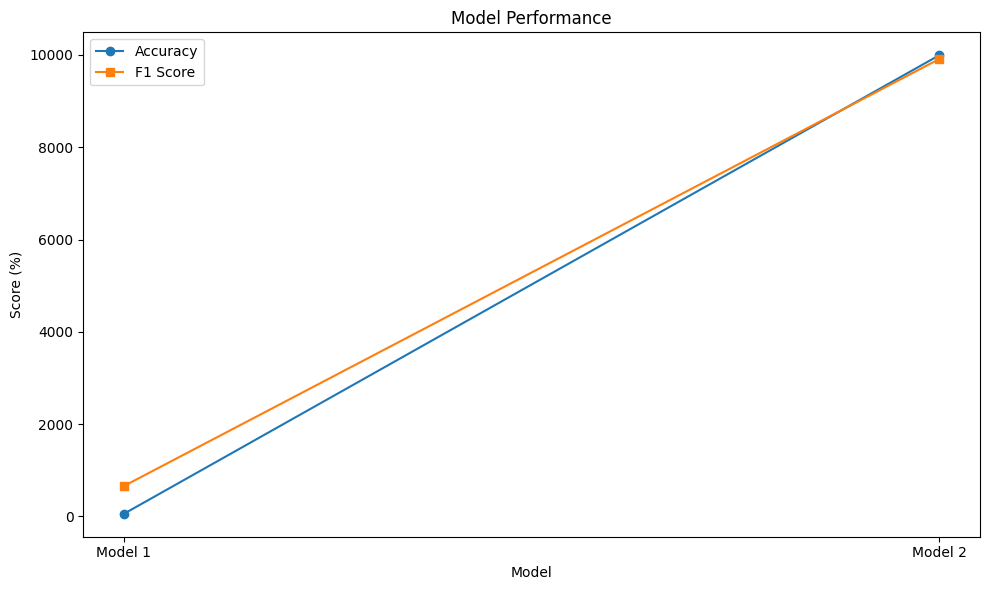

In [89]:
results = [
    {"accuracy": 99.94, "f1":99.12 },
    {"accuracy": 0.56, "f1": 6.58},
]
sorted_results = sorted(results, key=lambda x: x['accuracy'])
accuracies = [result['accuracy'] * 100 for result in sorted_results]
f1_scores = [result['f1'] * 100 for result in sorted_results]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(accuracies, label='Accuracy', marker='o')
plt.plot(f1_scores, label='F1 Score', marker='s')

plt.xlabel('Model')
plt.ylabel('Score (%)')
plt.title('Model Performance')
plt.xticks(ticks=range(len(accuracies)), labels=[f'Model {i+1}' for i in range(len(accuracies))])
plt.legend()
plt.tight_layout()
plt.savefig("Accuracy_graph")
plt.show()


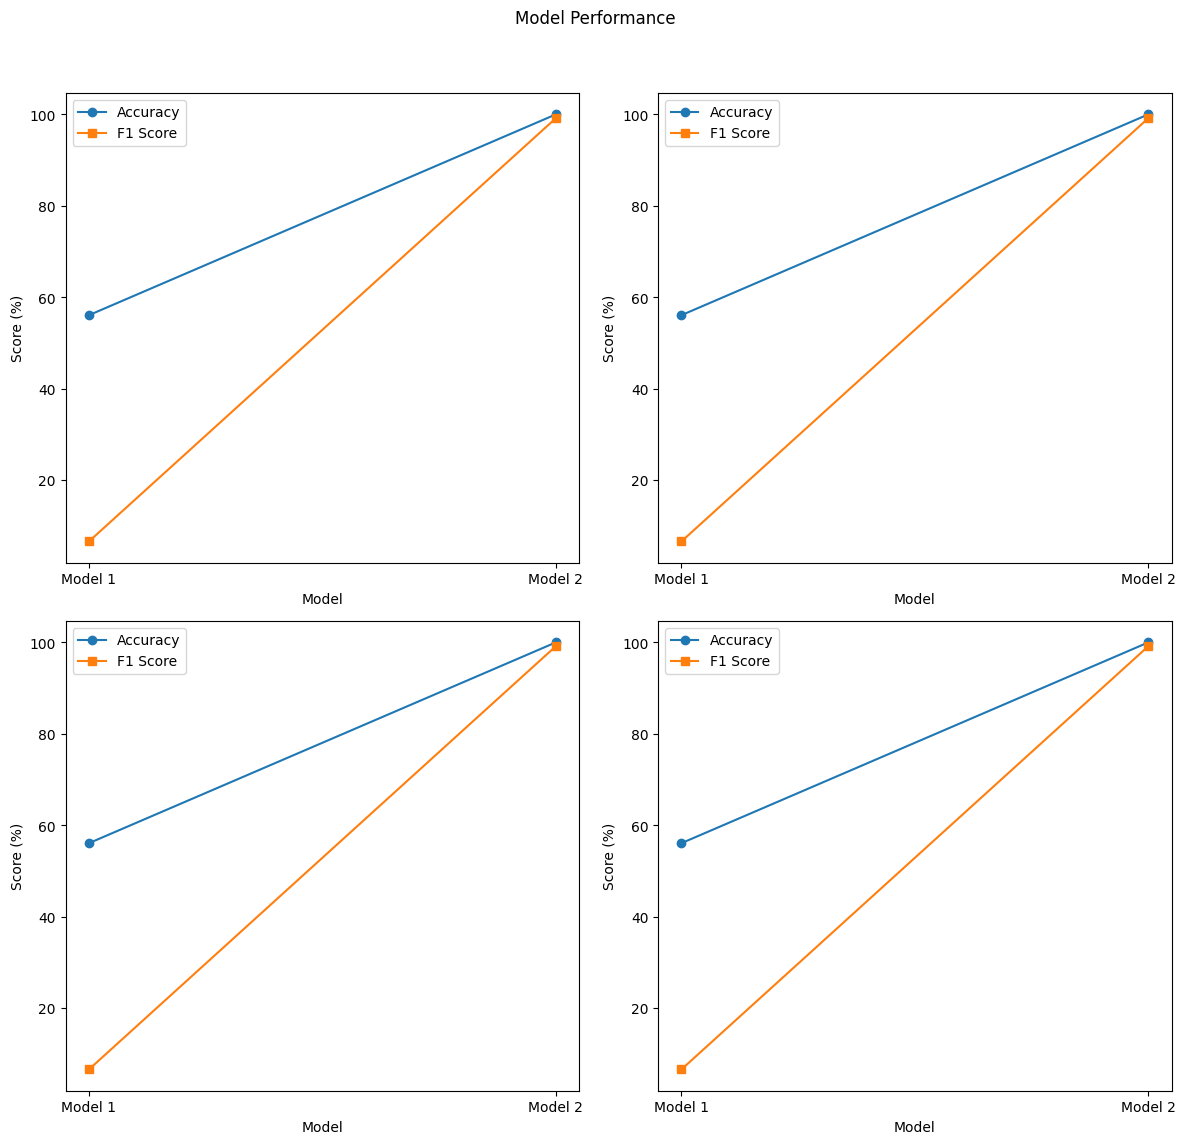

In [90]:
import matplotlib.pyplot as plt

results = [
    {"accuracy": 99.94, "f1": 99.12},
    {"accuracy": 56.04, "f1": 6.58},
]
sorted_results = sorted(results, key=lambda x: x['accuracy'])
accuracies = [result['accuracy'] for result in sorted_results]
f1_scores = [result['f1'] for result in sorted_results]

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Model Performance')

for ax in axs.flatten():
    ax.plot(accuracies, label='Accuracy', marker='o')
    ax.plot(f1_scores, label='F1 Score', marker='s')
    ax.set_xlabel('Model')
    ax.set_ylabel('Score (%)')
    ax.set_xticks(range(len(accuracies)))
    ax.set_xticklabels([f'Model {i+1}' for i in range(len(accuracies))])
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("Acc_Sub_plots")
plt.show()


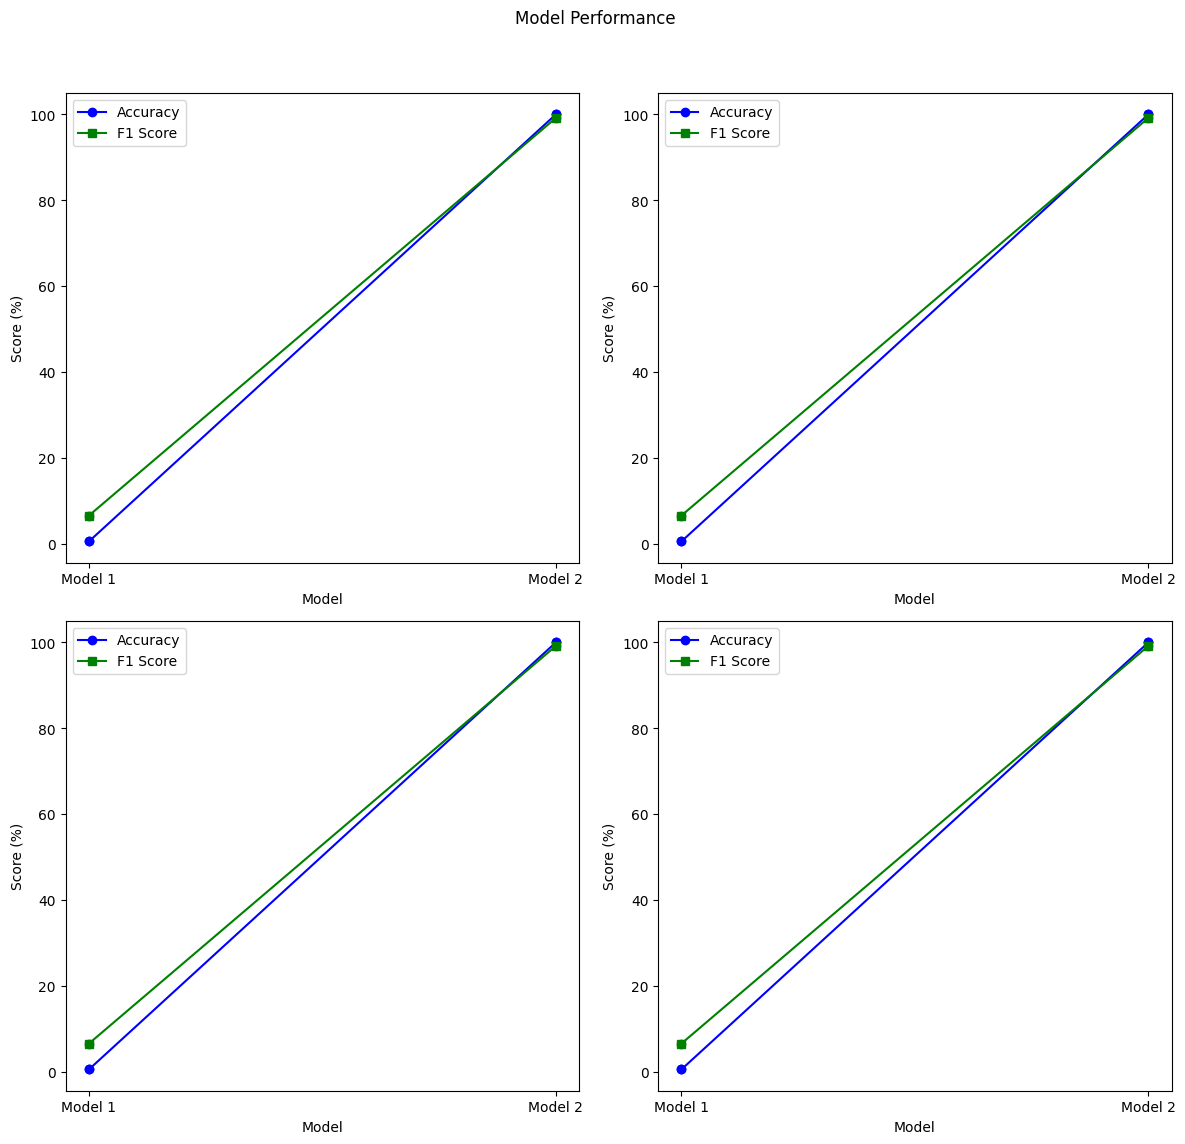

In [86]:
import matplotlib.pyplot as plt

results = [
    {"accuracy": 99.94, "f1": 99.12},
    {"accuracy": 56.04, "f1": 6.58},
]
sorted_results = sorted(results, key=lambda x: x['accuracy'])
accuracies = [result['accuracy'] for result in sorted_results]
f1_scores = [result['f1'] for result in sorted_results]

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Model Performance')

for ax in axs.flatten():
    # Line plot
    ax.plot(accuracies, label='Accuracy', marker='o', linestyle='-', color='b')
    ax.plot(f1_scores, label='F1 Score', marker='s', linestyle='-', color='g')

    # Scatter plot
    ax.scatter(range(len(accuracies)), accuracies, color='b')
    ax.scatter(range(len(f1_scores)), f1_scores, color='g')

    ax.set_xlabel('Model')
    ax.set_ylabel('Score (%)')
    ax.set_xticks(range(len(accuracies)))
    ax.set_xticklabels([f'Model {i+1}' for i in range(len(accuracies))])
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
importent_data

,title,calories,protein,rating,ingredients,fat,Cuisine Preference,tags
0,"Lentil, Apple, and Turkey Wrap",426.0,30.0,2.500,cups vegetable chicken stock cup dried brown l...,7.0,other,cups vegetable chicken stock cup dried brown l...
1,Boudin Blanc Terrine with Red Onion Confit,403.0,18.0,4.375,cups whipping cream medium onions chopped teas...,23.0,other,cups whipping cream medium onions chopped teas...
2,Potato and Fennel Soup Hodge,165.0,6.0,3.750,fennel bulb sometimes called anise stalks disc...,7.0,other,fennel bulb sometimes called anise stalks disc...
4,Spinach Noodle Casserole,547.0,20.0,3.125,package frozen spinach thawed pound egg noodle...,32.0,other,package frozen spinach thawed pound egg noodle...
5,The Best Blts,948.0,19.0,4.375,cups lightly packed fresh basil leaves cup may...,79.0,other,cups lightly packed fresh basil leaves cup may...
...,...,...,...,...,...,...,...,...
20125,Parmesan Puffs,28.0,2.0,3.125,large egg whites oz finely grated cup cups veg...,2.0,other,large egg whites oz finely grated cup cups veg...
20126,Artichoke and Parmesan Risotto,671.0,22.0,4.375,cups chicken broth tablespoons butter divided ...,28.0,Italian,cups chicken broth tablespoons butter divided ...
20127,Turkey Cream Puff Pie,563.0,31.0,4.375,small tomato small onion finely chopped cup ta...,38.0,other,small tomato small onion finely chopped cup ta...
20128,Snapper on Angel Hair with Citrus Cream,631.0,45.0,4.375,tablespoons olive oil shallots thinly sliced c...,24.0,other,tablespoons olive oil shallots thinly sliced c...


In [ ]:
def recommend(recipie):
    index =importent_data[importent_data['title'] == recipie].index[1]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:10]:
        print(importent_data.iloc[i[0]].title)

In [92]:
print("Thank you")

Thank you
